In [ ]:
#Required packages
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score, matthews_corrcoef
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import statistics as stat
from sklearn.preprocessing import MinMaxScaler
from subprocess import call
import seaborn as sns
from sklearn.utils import shuffle
import time
from google.colab import drive

drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive


# Read Dataset - Loading Your Dataset

In [ ]:
#MODIFY your path to dataset

dataset = pd.read_csv(filepath_or_buffer='dataset.csv') 
dataset.drop('Unnamed: 0', axis = 1, inplace=True)

#dropping any not-a-number values
dataset.dropna(subset=['DataSize'], inplace=True)

In [ ]:
#Counting the samples in your dataset

count0 = dataset[dataset['Function'] == 0].shape[0]
count1 = dataset[dataset['Function'] == 1].shape[0]
count2 = dataset[dataset['Function'] == 2].shape[0]
count3 = dataset[dataset['Function'] == 3].shape[0]
count4 = dataset[dataset['Function'] == 4].shape[0]
count5 = dataset[dataset['Function'] == 5].shape[0]

print("Samples of Class 0: {}".format(count0))  #Class 0 = Brake Light
print("Samples of Class 1: {}".format(count1))  #Class 1 = Steering Angle
print("Samples of Class 2: {}".format(count2))  #Class 2 = Vehicle Speed
print("Samples of Class 3: {}".format(count3))  #Class 3 = Tachometer
print("Samples of Class 4: {}".format(count4))  #Class 4 = Lights
print("Samples of Class 5: {}".format(count5))  #Class 5 = Unidentified ECUs

Samples of Class 0: 173433
Samples of Class 1: 346785
Samples of Class 2: 346918
Samples of Class 3: 677763
Samples of Class 4: 72296
Samples of Class 5: 8351625


# Sampling the Dataset - What Inputs Am I Feeding My Machine Learning Models?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


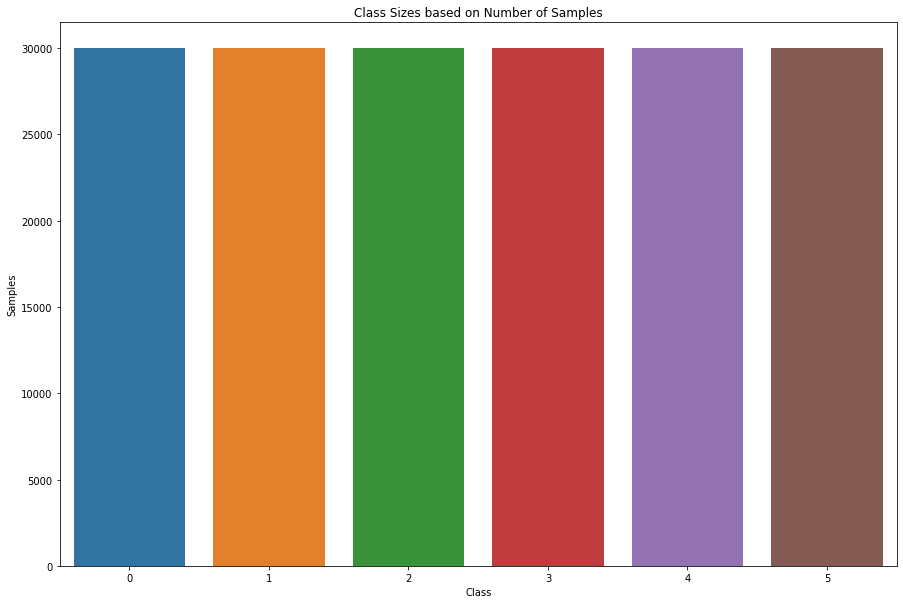

In [ ]:
plt.rcParams['figure.figsize'] = [15, 10]

# Shuffle the Dataset.
shuffled_dataset = dataset.sample(frac=1,random_state=1)

# Put all the majority class samples in a separate dataset.
majorityclass_dataset = shuffled_dataset.loc[shuffled_dataset['Function'] == 5].sample(n=30000, random_state=42)

# Randomly select observations from the minority classes
minorityclass0_dataset = shuffled_dataset.loc[shuffled_dataset['Function'] == 0].sample(n=30000,random_state=42)
minorityclass1_dataset = shuffled_dataset.loc[shuffled_dataset['Function'] == 1].sample(n=30000,random_state=42)
minorityclass2_dataset = shuffled_dataset.loc[shuffled_dataset['Function'] == 2].sample(n=30000,random_state=42)
minorityclass3_dataset = shuffled_dataset.loc[shuffled_dataset['Function'] == 3].sample(n=30000,random_state=42)
minorityclass4_dataset = shuffled_dataset.loc[shuffled_dataset['Function'] == 4].sample(n=30000,random_state=42)

# Concatenate both dataframes again to obtain a single dataset
dataset_balanced = pd.concat([majorityclass_dataset, minorityclass0_dataset, minorityclass1_dataset, minorityclass2_dataset, minorityclass3_dataset, minorityclass4_dataset])

# Plot the dataset after the undersampling
sns.countplot('Function', data=dataset_balanced)
plt.title('Class Sizes based on Number of Samples')
plt.xlabel('Class')
plt.ylabel('Samples')
plt.show()

#Renaming the columns
column_labels = ["ModTime", "DataSize", "ModData", "ModID", "Function"]
dataset_balanced = dataset_balanced.reindex(columns=column_labels)

In [ ]:
dataset_balanced.head()

,ModTime,DataSize,ModData,ModID,Function
10658408,25.0,6.0,281410535489535,533,5
5628237,288.0,8.0,18307132486099927040,375,5
318770,138.0,8.0,18374686479890514153,386,5
1307844,454.0,8.0,2596667628491913744,384,5
2213868,414.0,6.0,281427715358719,533,5


# Perform Standard Scaling for Input to kNN Model

In [ ]:
from sklearn.preprocessing import StandardScaler

#Scaling Features for kNN 

scaler_object = StandardScaler()
scaled_temp = scaler_object.fit(dataset_balanced[['ModTime', 'DataSize', 'ModData']])
scaled_df = scaled_temp.transform(dataset_balanced[['ModTime', 'DataSize', 'ModData']])

# Train and Test kNN

In [ ]:
#INSERT your parameters for kNN below

knn = KNeighborsClassifier(n_neighbors=2)

#MODIFY training/test split

X_train, X_test, y_train, y_test = train_test_split(scaled_df, dataset_balanced['Function'], train_size=0.75)

train_startTime = time.time()
knn = knn.fit(X_train, y_train)
train_endTime = time.time()

test_startTime = time.time()
knn_predicted = knn.predict(X_test)
test_endTime = time.time()

knn_accuracy_score = accuracy_score(y_test, knn_predicted)
knn_accuracy_score = knn_accuracy_score * 100

knn_mcc_score = matthews_corrcoef(y_test, knn_predicted)

#Computing Accuracy
print("Accuracy: {}".format(knn_accuracy_score))

#Computing MCC
print("MCC Score: {}".format(knn_mcc_score))

#Computing train and test times
print("\nTrain time KNN ({})Samples): {}".format(int(0.6 * len(X_train)), train_endTime - train_startTime))

print("\nTest time KNN ({}) Samples): {}".format(int(0.4 * len(y_test)), test_endTime - test_startTime))


Accuracy: 95.47777777777777
MCC Score: 0.9462665100541853

Train time KNN (81000)Samples): 0.1840803623199463

Test time KNN (18000) Samples): 3.278258800506592


# Train and Test Decision Tree

In [ ]:
dataset_np = dataset_balanced.to_numpy(float)

dataset.head()

X = dataset_np[0:, 0:3]
y = dataset_np[0:, 4]


#INSERT your parameters for Decision Tree below

DT_classifier = tree.DecisionTreeClassifier(max_depth=5)

#MODIFY training/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

#Training
train_startTime = time.time()
DT_classifier = DT_classifier.fit(X_train, y_train)
train_endTime = time.time()

#Inference
test_startTime = time.time()
DT_classifier_predicted = DT_classifier.predict(X_test)
test_endTime = time.time()

dt_accuracy_score = accuracy_score(y_test, DT_classifier_predicted)
dt_accuracy_score = dt_accuracy_score  * 100

dt_mcc_score = matthews_corrcoef(y_test, DT_classifier_predicted)

#Computing accuracy
print("Accuracy: {}".format(dt_accuracy_score))

#Computing MCC
print("MCC Score: {}".format(dt_mcc_score))

#Computing train and test times
print("\nTrain time DT({} Samples): {}".format(int(0.6 * len(X)), train_endTime - train_startTime))

print("\nTest time DT ({} Samples): {}".format(int(0.4 * len(X)), test_endTime - test_startTime))


Accuracy: 83.45401011092387
MCC Score: 0.8130042682026387

Train time DT(108000 Samples): 0.18101215362548828

Test time DT (72000 Samples): 0.0055429935455322266


# Train and Test Gaussian Naive Bayes (GNB)

In [ ]:
dataset_np = dataset_balanced.to_numpy(float)

dataset.head()

X = dataset_np[0:, 0:3]
y = dataset_np[0:, 4]

#MODIFY the parameter for GNB below

gnb = GaussianNB(var_smoothing=1e+3)

#MODIFY training/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

#Training
train_startTime = time.time()
gnb.fit(X_train, y_train)
train_endTime = time.time()

#Inference
test_startTime = time.time()
gnb_predicted = gnb.predict(X_test)
test_endTime = time.time()

#Computing accuracy

gnb_accuracy_score = accuracy_score(y_test, gnb_predicted)
gnb_accuracy_score = gnb_accuracy_score * 100

#Computing MCC
gnb_mcc_score = matthews_corrcoef(y_test, gnb_predicted)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")

#Computing Accuracy
print("Accuracy: {}".format(gnb_accuracy_score))

#Computing MCC
print("MCC Score: {}".format(gnb_mcc_score))

#Computing train and test times

print("\nTrain time GNB({} Samples): {}".format(int(0.6 * len(X)), train_endTime - train_startTime))

print("\nTest time GNB ({} Samples): {}".format(int(0.4 * len(X)), test_endTime - test_startTime))

# Graphing Your Results

In [ ]:
acc_dict = {"Decision Tree":[dt_accuracy_score], "Gaussian NB":[gnb_accuracy_score], "KNN":[knn_accuracy_score]}

models_pred = pd.DataFrame(data = acc_dict)

plt.figure(figsize=(15, 10))
barplot_acc = sns.barplot(data = models_pred, palette="flare")
barplot_acc.set(title="Classifer Performance in ECU Identification", xlabel="Classifier", ylabel="Accuracy")

In [ ]:
mcc_dict = {"Decision Tree":[dt_mcc_score], "Gaussian NB":[gnb_mcc_score], "KNN":[knn_mcc_score]}
models_pred = pd.DataFrame(data = mcc_dict)

plt.figure(figsize=(15, 10))
barplot_mcc = sns.barplot(data = models_pred, palette="light:#27A8")
barplot_mcc.set(title="Classifer Performance in ECU Identification", xlabel="Classifier", ylabel="Matthews Correlation Coefficient")